# Content with notebooks

You can also create content with Jupyter Notebooks. This means that you can include
code blocks and their outputs in your book.

## Markdown + notebooks

As it is markdown, you can embed images, HTML, etc into your posts!

![](https://myst-parser.readthedocs.io/en/latest/_static/logo-wide.svg)

You can also $add_{math}$ and

$$
math^{blocks}
$$

or

$$
\begin{aligned}
\mbox{mean} la_{tex} \\ \\
math blocks
\end{aligned}
$$

But make sure you \$Escape \$your \$dollar signs \$you want to keep!

## MyST markdown

MyST markdown works in Jupyter Notebooks as well. For more information about MyST markdown, check
out [the MyST guide in Jupyter Book](https://jupyterbook.org/content/myst.html),
or see [the MyST markdown documentation](https://myst-parser.readthedocs.io/en/latest/).

## Code blocks and outputs

Jupyter Book will also embed your code blocks and output in your book.
For example, here's some sample Matplotlib code:

In [1]:
# here we will import the libraries used for machine learning

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from plotnine import * # incluye funciones de ggplot
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

In [2]:
data = pd.read_csv(".\data.csv",header=0)

A continuación revisamos la estructura del dataframe y de las variables que contiene

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


En este caso el interés es clasificar correctamente los diagnosticos de una base datos. A continuación visualizamos los diagnosticos.

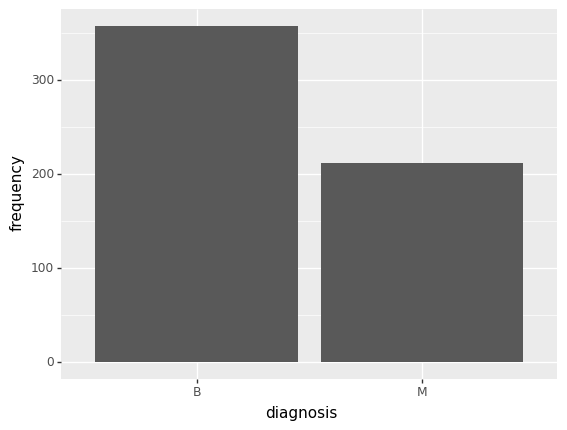

<ggplot: (84498808163)>

In [5]:
a = (data
                       .groupby("diagnosis")
                       .agg(frequency=("diagnosis", "count"))
                       .reset_index())

(ggplot(a) +
  geom_bar(aes(x = "diagnosis", y = "frequency"), stat = 'identity'))


A continuación examinamos la distribución de los diagnosticos de acuerdo con otras variables de la base de datos